<a href="https://colab.research.google.com/github/mmolina2024/hcspd2024/blob/main/Ejercicio_1_1_Simbolico_RLC_Octave_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución simbólica en un circuito RLC

Se resuelve la ecuacion diferencial del circuito RLC de la figura.

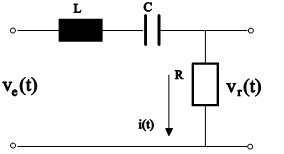

Las ecuaciones son
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\frac{di(t)}{dt}=-\frac{R}{L}i(t)-\frac{1}{L}v_c(t) + \frac{1}{L}v_e(t)  \\
\frac{dv_c(t)}{dt}=\frac{1}{C}i(t)
\end{cases}
\end{equation*} \tag*{}$

con las condiciones iniciales nulas para la corriente $i(0)=0$ y la tensión del capacitor $v_c(0)=0$.

## Instalación de Octave en el entorno Colab
Se instala el programa Octave, y las librerías necesarias.

In [ ]:
# !apt-get update #Usar para actualizar librerias, únicamente

In [1]:
!apt install octave #Instala colab en el entorno de trabajo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

In [ ]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
The following additional packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-mpmath python3-numpy python3-olefile
  python3-pil
Suggested packages:
  python-mpmath-doc python3-gmpy2 python3-matplotlib python-numpy-doc python3-pytest python-pil-doc
  texlive-fonts-extra dvipng python-sympy-doc
The following NEW packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-mpmath python3-numpy python3-olefile
  python3-pil python3-sympy
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,725 kB of archives.
After this operation, 54.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libraqm0 amd64 0.7.0-4ubuntu1 [11.7 kB]
Get:3

In [ ]:
%%writefile Inst_S.m
pkg install -forge symbolic

Writing Inst_S.m


In [ ]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [ ]:
!pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cudnn-cu12==8.

Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**


---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


In [ ]:
%%writefile Calculo_RLC_Simbolico.m
clear all; clc;
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
% #R=1e3;L=1e-6;C=1e-9;
syms ii(t) v(t)
ode2=diff(v)==ii;
% ode1=diff(ii)==-R/L*ii-1/L*v+1/L*heaviside(0);
ode1=diff(ii)==-ii-v+heaviside(0,1);%heaviside(0) devuelve .5
cond1 = ii(0) == 0;
cond2 = v(0) == 0;
conds = [cond1;cond2];
odes = [ode1; ode2];
Sol=dsolve(odes,ii(0) == .0,v(0) == .0);
Corriente=simplify(Sol.ii)
Tension=simplify(Sol.v)

Overwriting Calculo_RLC_Simbolico.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [ ]:
!octave -W Calculo_RLC_Simbolico.m # -W : no window system

Symbolic pkg v3.2.1: Python communication link active, SymPy v1.5.1.
Corriente = (sym)

        -t           
        ───          
         2     ⎛√3⋅t⎞
  2⋅√3⋅ℯ   ⋅sin⎜────⎟
               ⎝ 2  ⎠
  ───────────────────
           3         

Tension = (sym)

            -t               
            ───              
             2     ⎛√3⋅t   π⎞
      2⋅√3⋅ℯ   ⋅sin⎜──── + ─⎟
                   ⎝ 2     3⎠
  1 - ───────────────────────
                 3           




# Verificación numérica

Queda como tarea completar el script siguiente para verificar las soluciones obtenidas analíticamente.

In [ ]:
%%writefile Verificacion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0];ii=0;t_etapa=1e-8;wRef=2;tF=1e-3;
color_='r';
color='b';
Ts=t_etapa;
%A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts);
%B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts);
%C1=Kd/Ts;
%e=zeros(round(tF/t_etapa),1);
u=0;TL=1.15e-4;u=12;
%graphics_toolkit("gnuplot"); %No aconsejado
%graphics_toolkit("fltk");
%graphics_toolkit("qt"); %Aconsejado
% x1(1)=X(1);%corriente
% x2(2)=X(2);%tensión en el capacitor
for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;
  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  X=modrlc(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x1,color_);title('x_1 corriente'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x2,color_);title('x_2 Vc_t');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

Writing Verificacion_Num.m


In [ ]:
%%writefile modrlc.m
%Funcion modelo
function [X]=modrlc(t_etapa, xant, accion)
h=1e-9;t_simul=3e-3;R=2.2e3;L=10e-6;C=100e-9;
A=[-R/L, -1/L;1/C,0];B=[1/L;0];%
% eig(A)
% 1./ans
C=[R 0];u=accion;
x=xant;
for ii=1:t_etapa/h
xp=A*x+B*u;
x=x+xp*h;
end
X=[x];%x1 corriente, x2 tensión

Overwriting modrlc.m


In [ ]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

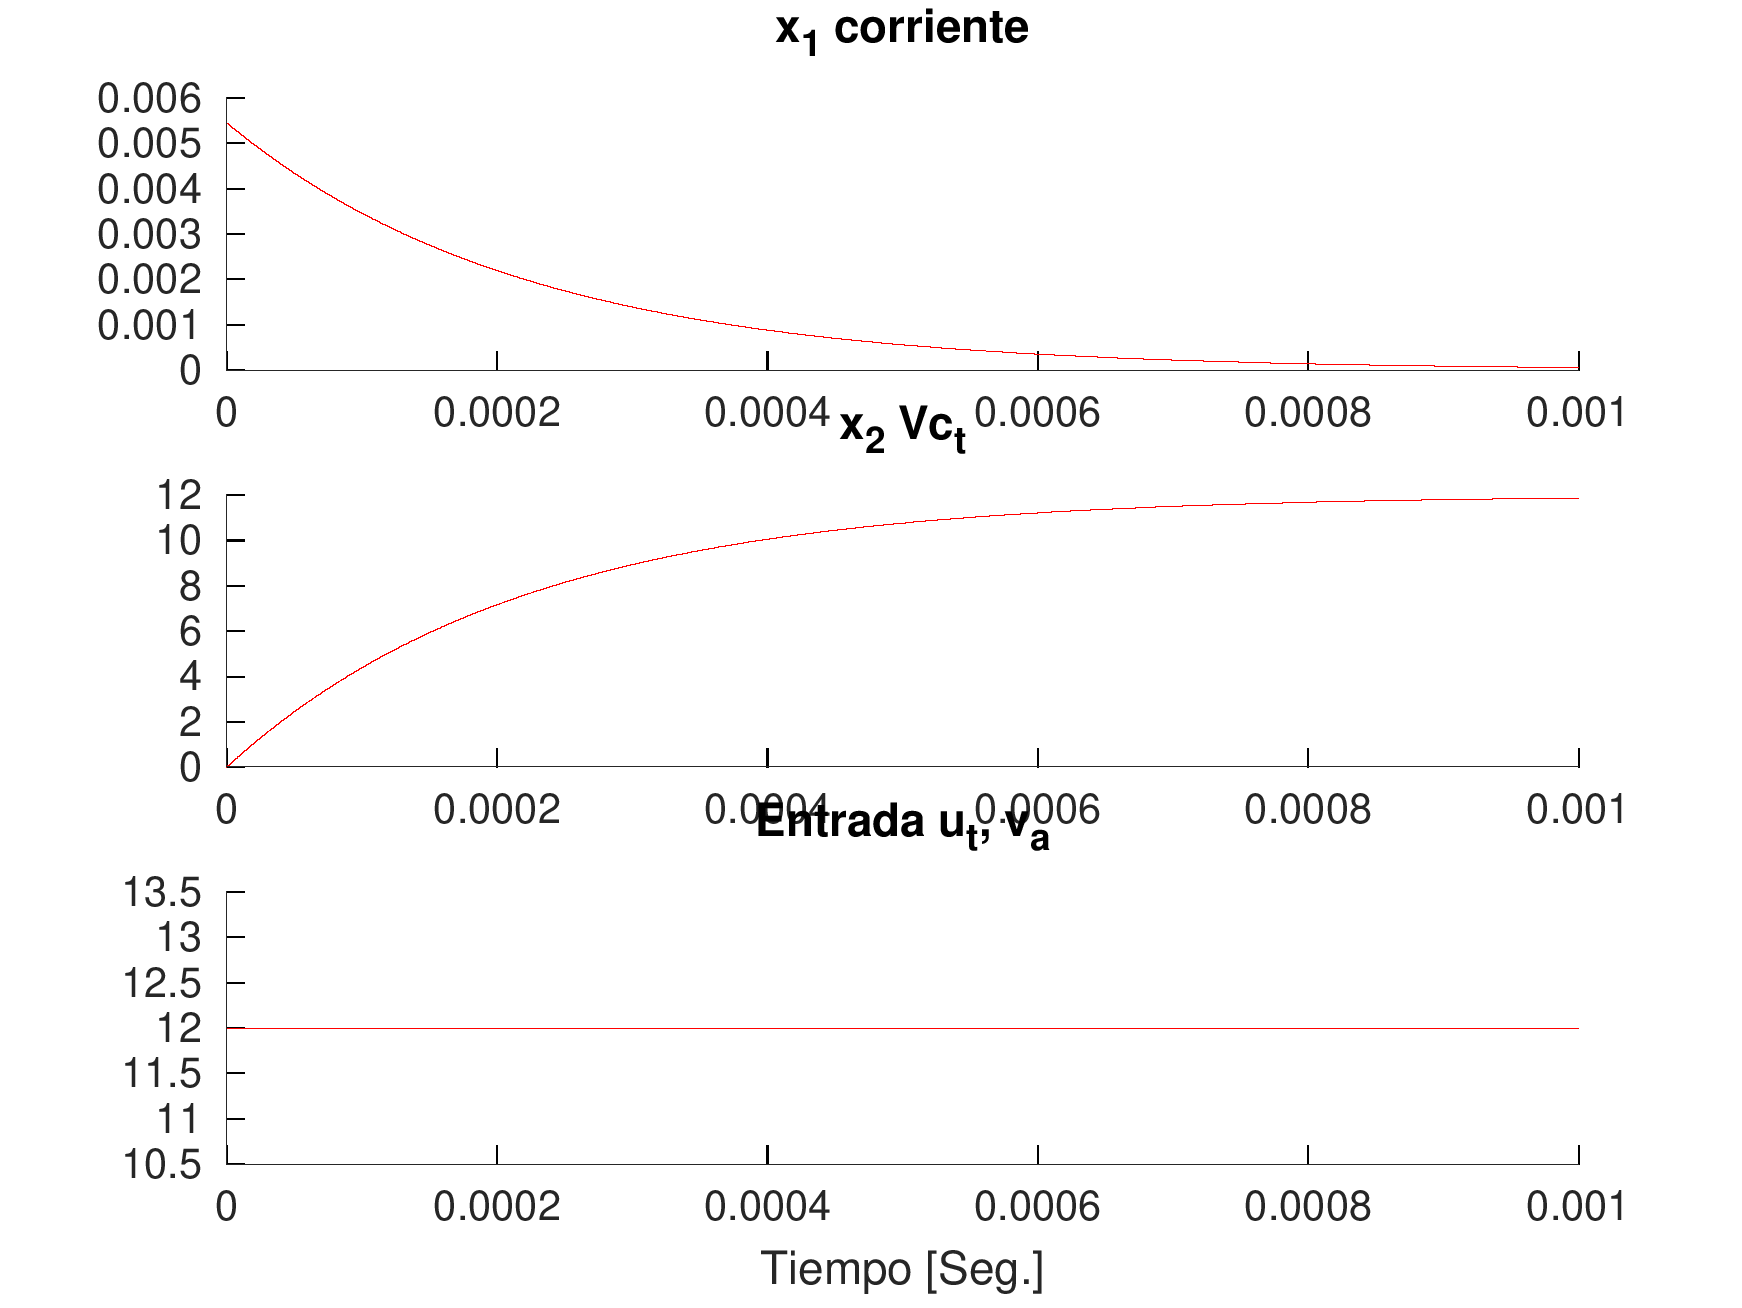

In [ ]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

In [ ]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil
fnames = ['Vars_temporal.png','Calculo_RLC_Simbolico.m','Verificacion_Num.m','Verificacion_Num_1.mat','modrlc.m'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  src = os.path.join('/content', fname)
  dst = os.path.join('/content/drive/MyDrive/CursoHCSPD2024', fname)
  shutil.copyfile(src, dst)

# Cierre
Para guardar todos los archivos y las imágenes generadas en el Gdrive, se puede proceder mediante el montado en el entorno de trabajo, y luego copiar todo mediante Python. Con la instrucción de Linux `!cp archivo dir_destino` se puede copiar uno por uno todos los archivos.

# Cálculo Simbólico

In [ ]:
from sympy import *
import numpy as np
from sympy.functions.special.delta_functions import Heaviside
init_printing(use_unicode=True)
t=symbols('t')
ii=Function('ii')
v=Function('v')
ODE1=Eq(Derivative(ii(t),t),-ii(t)-v(t)+Heaviside(0))
ODE2=Eq(Derivative(v(t),t),ii(t))
eq=(ODE1,ODE2)
res=dsolve(eq,hint='all',ics={ii(0):0,v(0):0})
#Resultado en res[0] la corriente, y en res[1] la tensión
ten=simplify(res[1])

In [ ]:
simplify(res[0])

            -t           
            ───          
             2     ⎛√3⋅t⎞
        √3⋅ℯ   ⋅sin⎜────⎟
                   ⎝ 2  ⎠
ii(t) = ─────────────────
                3        

In [ ]:
simplify(res[1])

               -t               
               ───              
                2     ⎛√3⋅t   π⎞
           √3⋅ℯ   ⋅sin⎜──── + ─⎟
       1              ⎝ 2     3⎠
v(t) = ─ - ─────────────────────
       2             3          